#### Libraries and Packages

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score

In [24]:
df = pd.read_csv('/content/apartments_for_rent_classified_100K.csv', encoding='ISO-8859-1', delimiter=';')
df.head(2)

<ipython-input-24-56fb5357a011>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/apartments_for_rent_classified_100K.csv', encoding='ISO-8859-1', delimiter=';')


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [26]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.949200e+04,99429.000000,99368.000000,99491.000000,99492.000000,99467.000000,99467.000000,9.949200e+04
mean,5.358321e+09,1.445323,1.728212,1527.057281,956.430688,36.947988,-91.568656,1.559665e+09
std,1.847404e+08,0.547021,0.749200,904.245882,417.571522,4.599461,15.817168,1.105077e+07
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197950e+09,1.000000,1.000000,1013.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,5.508673e+09,1.000000,2.000000,1350.000000,900.000000,37.228200,-84.562300,1.568745e+09
75%,5.509007e+09,2.000000,2.000000,1795.000000,1115.000000,39.953000,-77.608200,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


#### Preprocessing Techniques

In [27]:
df.isnull().sum()

,0
id,0
category,0
title,0
body,0
amenities,16044
bathrooms,63
bedrooms,124
currency,0
fee,0
has_photo,0


In [28]:
# Fill missing values with their appropriate values
df['amenities'].fillna('None', inplace=True)
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['pets_allowed'].fillna('Unknown', inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)
df['price_display'].fillna(df['price_display'].mode()[0], inplace=True)
df['address'].fillna('Unknown', inplace=True)
df['cityname'].fillna('Unknown', inplace=True)
df['state'].fillna('Unknown', inplace=True)
df['latitude'].fillna(df['latitude'].median(), inplace=True)
df['longitude'].fillna(df['longitude'].median(), inplace=True)
print("Missing Values After Handling:\n", df.isnull().sum())

Missing Values After Handling:
 id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
address          0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64


In [29]:
# Convert columns to relevant or appropriate data types
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['id'] = pd.to_numeric(df['id'], downcast='integer')
df['square_feet'] = pd.to_numeric(df['square_feet'], downcast='integer')
df['time'] = pd.to_numeric(df['time'], downcast='integer')
categorical_columns = ['category', 'currency', 'fee', 'has_photo', 'pets_allowed', 'price_display', 'price_type', 'address', 'cityname', 'state', 'source']
for col in categorical_columns:
    df[col] = df[col].astype('category')

print(df.dtypes)

id                  int64
category         category
title              object
body               object
amenities          object
bathrooms         float64
bedrooms          float64
currency         category
fee              category
has_photo        category
pets_allowed     category
price             float64
price_display    category
price_type       category
square_feet         int32
address          category
cityname         category
state            category
latitude          float64
longitude         float64
source           category
time                int32
dtype: object


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             99492 non-null  int64   
 1   category       99492 non-null  category
 2   title          99492 non-null  object  
 3   body           99492 non-null  object  
 4   amenities      99492 non-null  object  
 5   bathrooms      99492 non-null  float64 
 6   bedrooms       99492 non-null  float64 
 7   currency       99492 non-null  category
 8   fee            99492 non-null  category
 9   has_photo      99492 non-null  category
 10  pets_allowed   99492 non-null  category
 11  price          99492 non-null  float64 
 12  price_display  99492 non-null  category
 13  price_type     99492 non-null  category
 14  square_feet    99492 non-null  int32   
 15  address        99492 non-null  category
 16  cityname       99492 non-null  category
 17  state          99492 non-null  

In [31]:
df = df.drop_duplicates()

In [32]:
df.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [33]:
df.head(2)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",None,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",None,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340


#### Exploratory Data Analysis

In [34]:
for col in categorical_columns:
    print(df[col].value_counts(), "\n")

category
housing/rent/apartment            99347
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64 

currency
USD    99408
Name: count, dtype: int64 

fee
No     99207
Yes      201
Name: count, dtype: int64 

has_photo
Yes          55908
Thumbnail    34302
No            9198
Name: count, dtype: int64 

pets_allowed
Unknown           60374
Cats,Dogs         37066
Cats               1840
Dogs                127
Cats,Dogs,None        1
Name: count, dtype: int64 

price_display
$1,350     575
$850       547
$1,200     537
$950       526
$1,100     522
          ... 
$4,781       1
$4,790       1
$4,791       1
$4,794       1
$999.99      1
Name: count, Length: 3718, dtype: int64 

price_type
Monthly           99404
Weekly                3
Monthly|Weekly        1
Name: count, dt

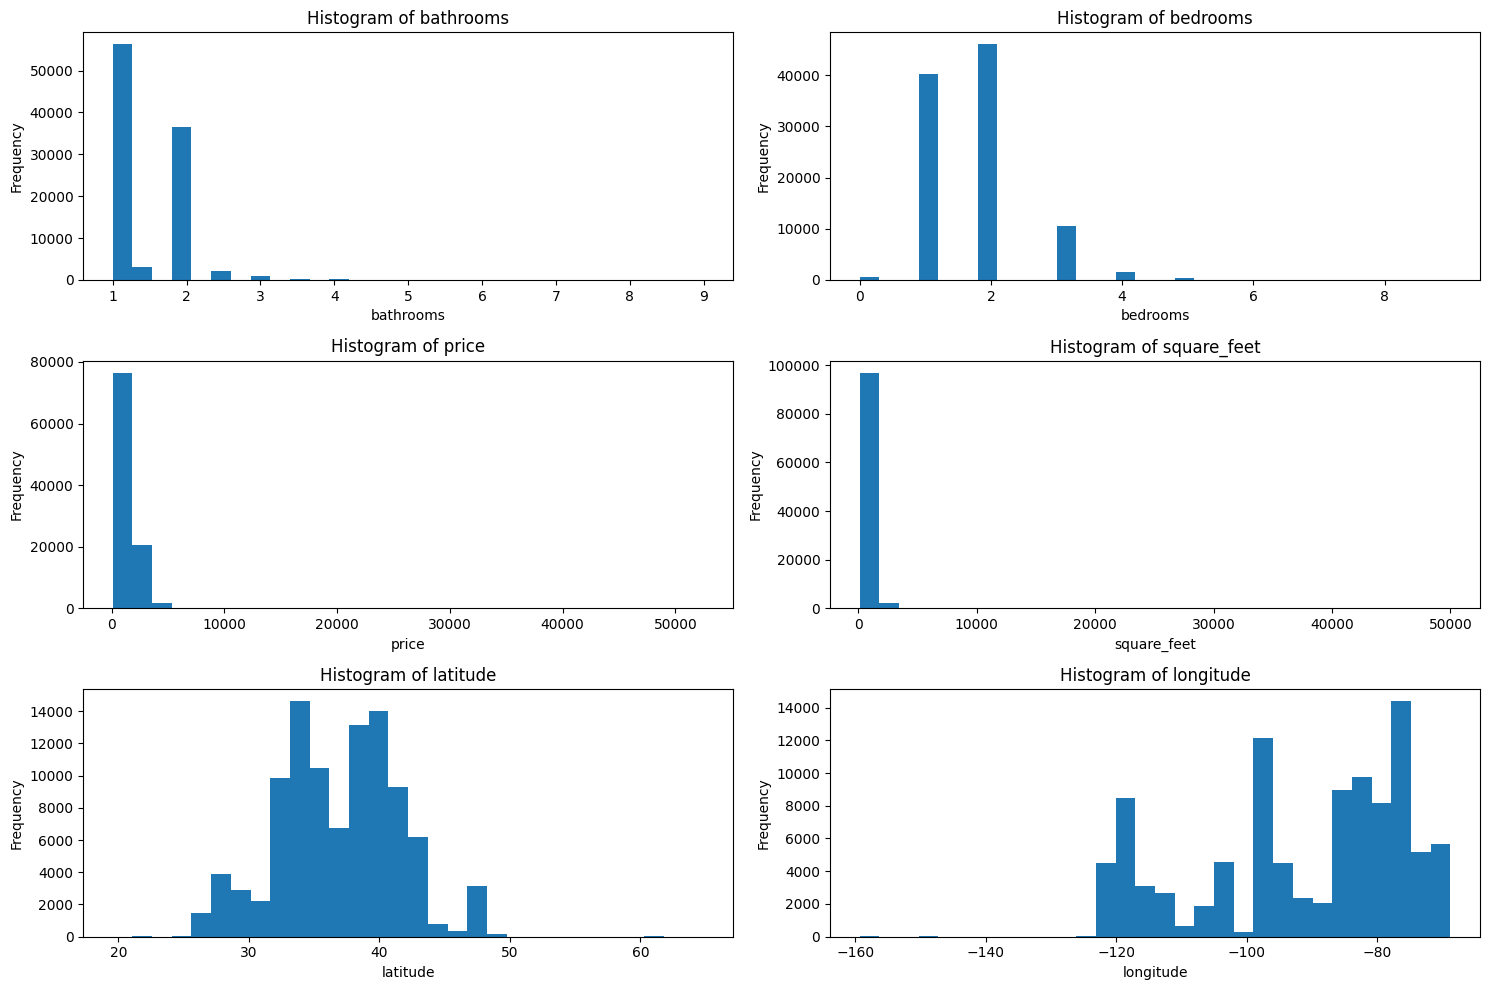

In [35]:
numerical_columns = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

axes = axes.flatten()
for ax, col in zip(axes, numerical_columns):
    df[col].plot(kind='hist', bins=30, ax=ax, title=f'Histogram of {col}')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

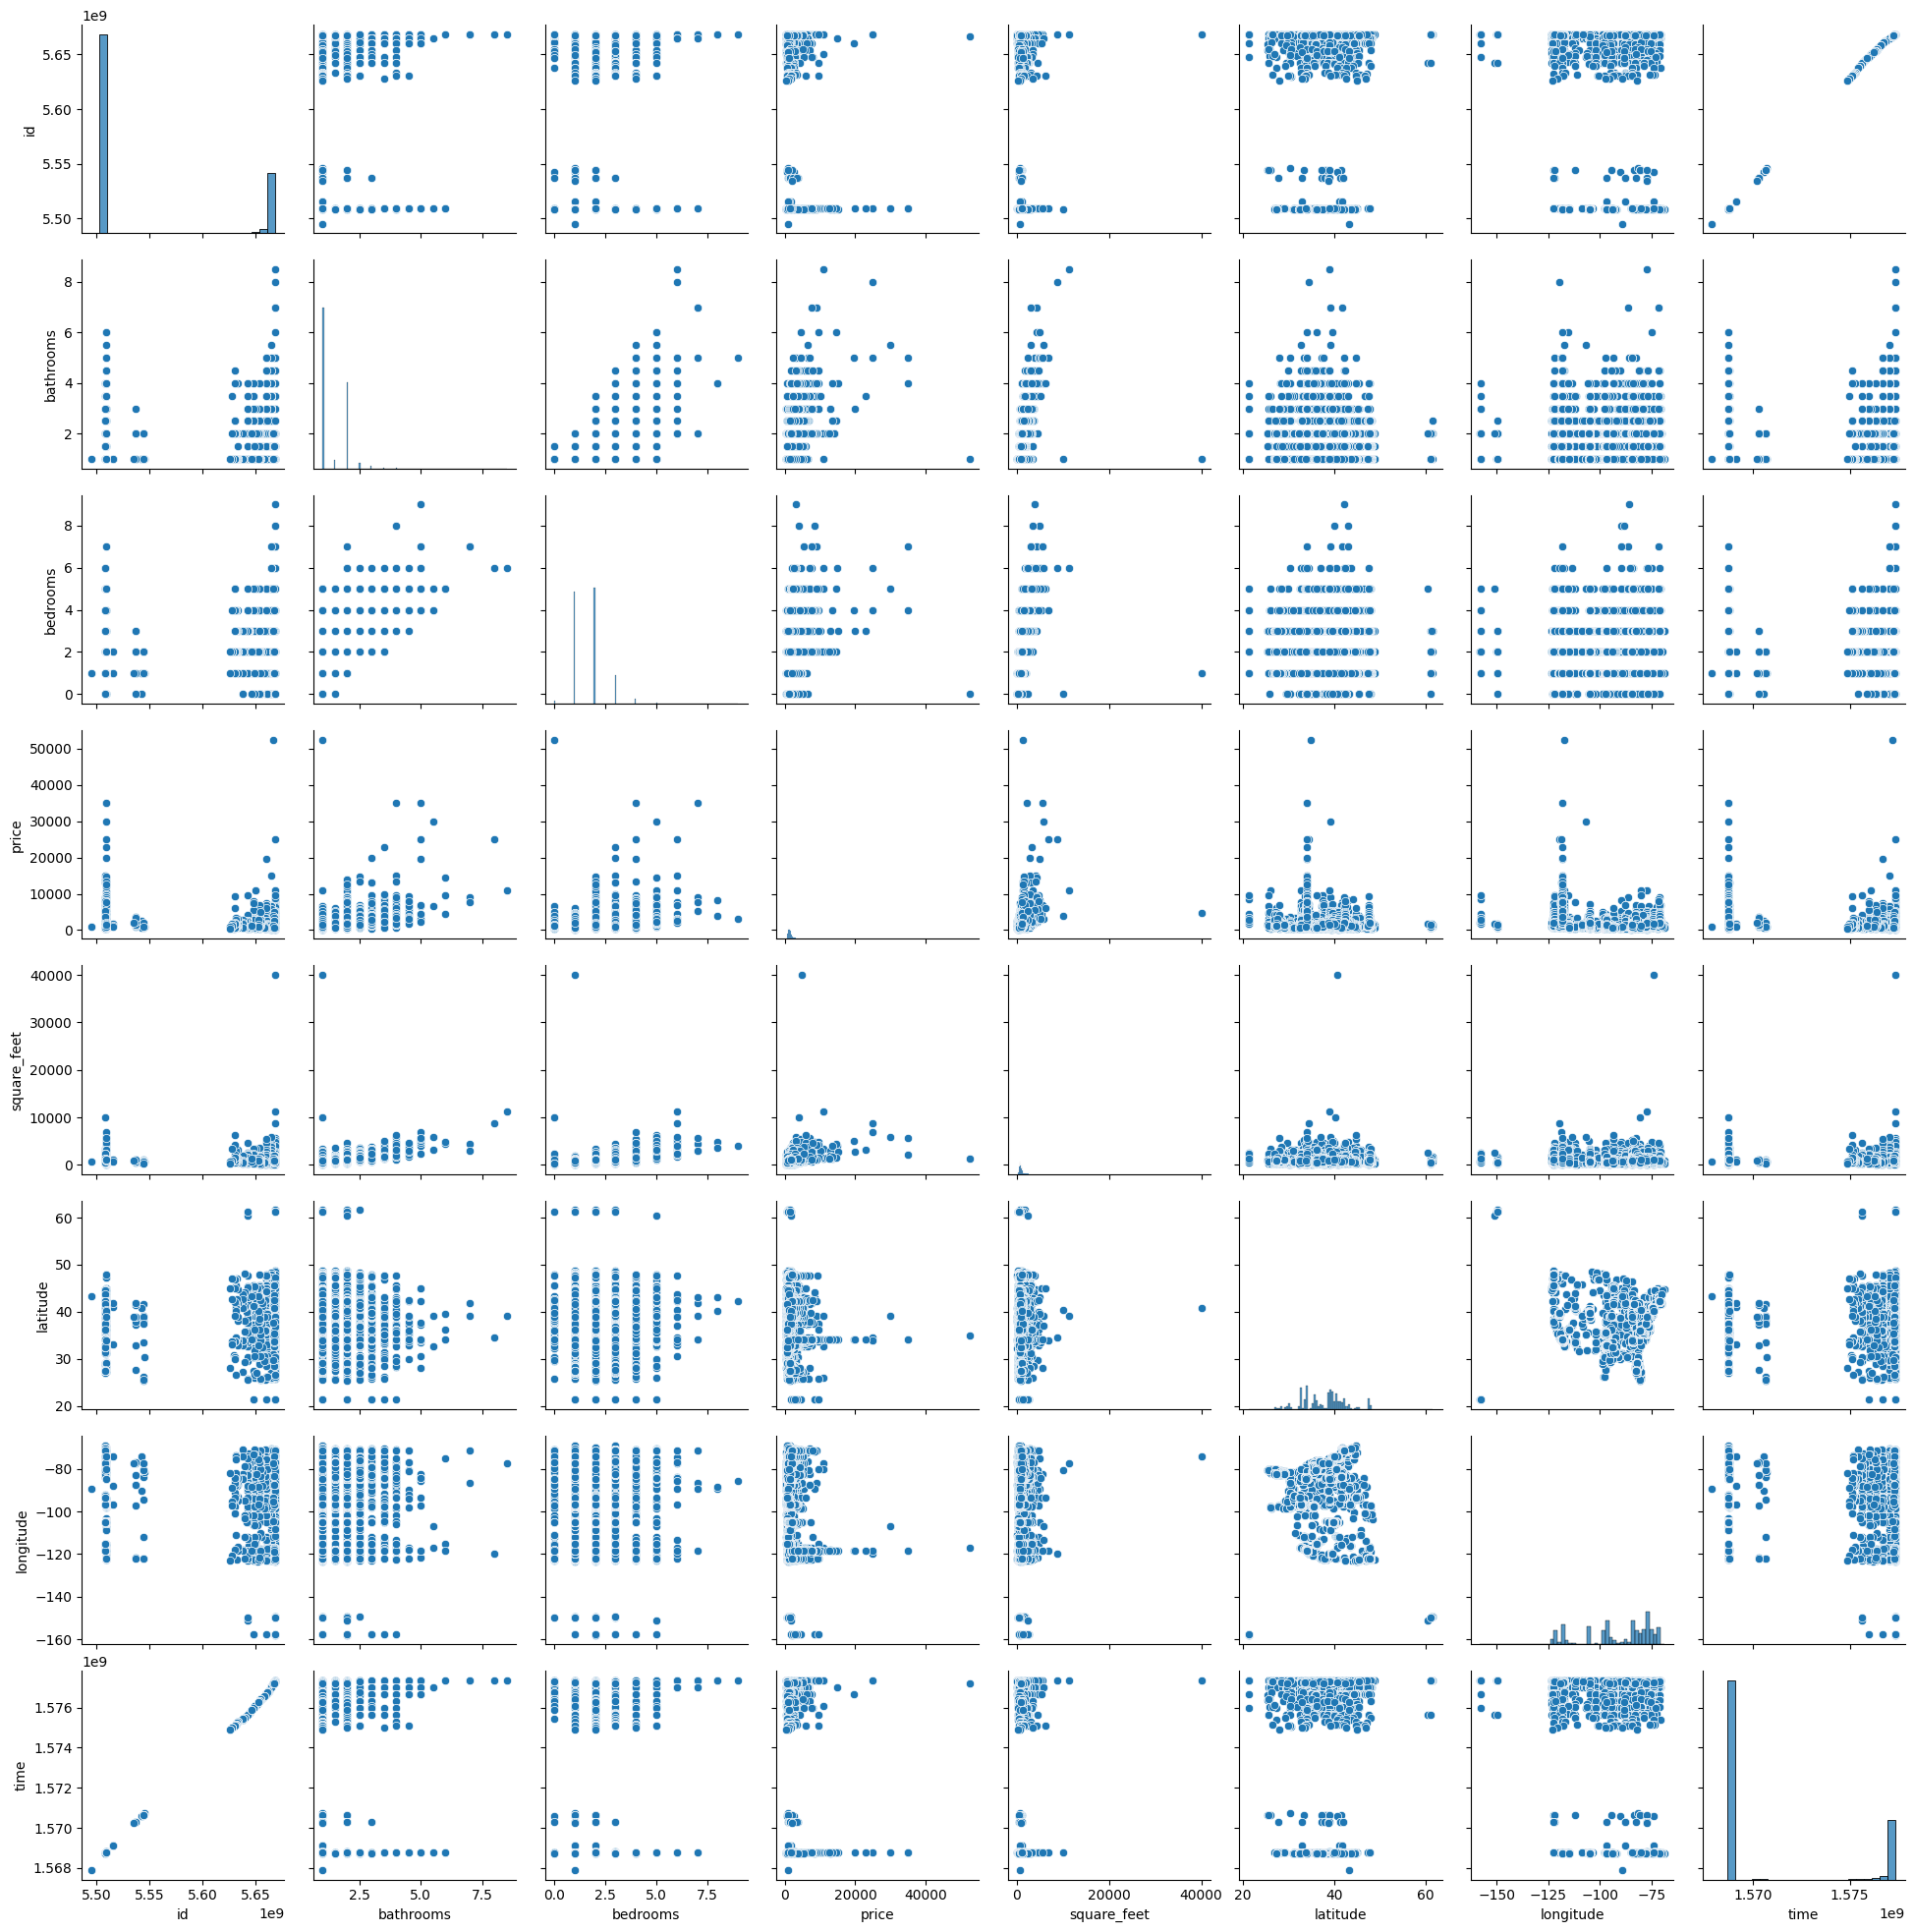

In [13]:
sns.pairplot(df)

In [36]:
# Analyzes of rental prices based on state
state_summary = df.groupby('state')['price'].describe()
print(state_summary)

           count         mean          std    min      25%     50%      75%  \
state                                                                         
AK          58.0  1050.758621   307.860661  685.0   850.00   945.0  1193.00   
AL         354.0   959.802260   507.120366  285.0   680.00   837.5  1124.00   
AR         598.0   874.367893   283.366656  200.0   700.00   820.0   973.50   
AZ        2376.0  1118.585017   408.184520  350.0   850.00  1085.0  1332.00   
CA       10301.0  2463.682652  1709.805069  493.0  1675.00  2195.0  2810.00   
CO        6279.0  1554.475872   587.410588  313.0  1270.00  1479.0  1754.50   
CT         509.0  1266.229862   381.000863  100.0   990.00  1190.0  1465.00   
DC          93.0  2112.139785   780.086612  790.0  1610.00  1922.0  2395.00   
DE           7.0  1154.857143   581.608525  755.0   800.00   825.0  1402.50   
FL        5773.0  1573.941625   998.415374  275.0  1140.00  1372.0  1686.00   
GA        4750.0  1350.718526   425.671356  350.0  1

<ipython-input-36-6435b5de3e66>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_summary = df.groupby('state')['price'].describe()


#### Data Segmentation - Clustering

In [37]:
# Select relevant features for clustering
clustering_features = df[['price', 'square_feet', 'bedrooms', 'bathrooms', 'latitude', 'longitude']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

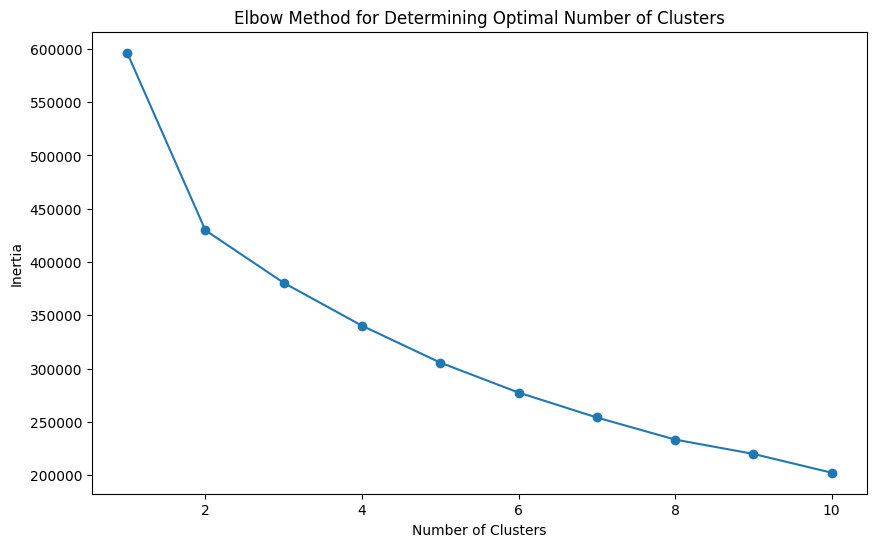

In [38]:
# Optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(clustering_features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()

In [127]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(clustering_features_scaled)

numerical_columns = ['price', 'square_feet', 'bedrooms', 'bathrooms', 'latitude', 'longitude']
cluster_summary = df.groupby('cluster')[numerical_columns].mean()

print(cluster_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


               price  square_feet  bedrooms  bathrooms   latitude   longitude
cluster                                                                      
0        1328.110792   733.332507  1.198148   1.016110  32.904604 -101.434333
1        1802.877674  1229.491565  2.319971   2.033069  36.458019  -91.540220
2        1328.787414   777.404195  1.371782   1.025302  40.204947  -85.072587


The clustering analysis segmented the data into three clusters with distinct property characteristics. Cluster 1 features larger, more expensive properties (avg. price $1803)
 suitable for families, while Clusters 0 and 2 have smaller, similarly priced properties (avg. price $1328 and $1329) differing mainly in location. Tailor marketing strategies to emphasize spaciousness and amenities for Cluster 1, and highlight neighborhood benefits for Clusters 0 and 2 to attract renters effectively.

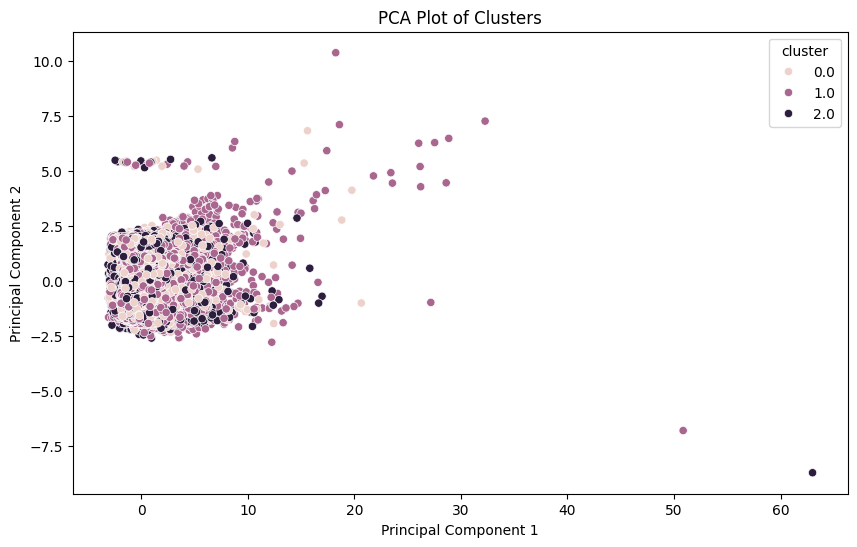

In [128]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clustering_features_scaled)

pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = df['cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster')
plt.title('PCA Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The PCA plot reveals distinct groupings among the three clusters, with Cluster 1 showing more variability in property characteristics, while Clusters 0 and 2 are more homogenous. For Cluster 1, emphasize diverse features in marketing, and for Clusters 0 and 2, target niche markets seeking consistent property features.

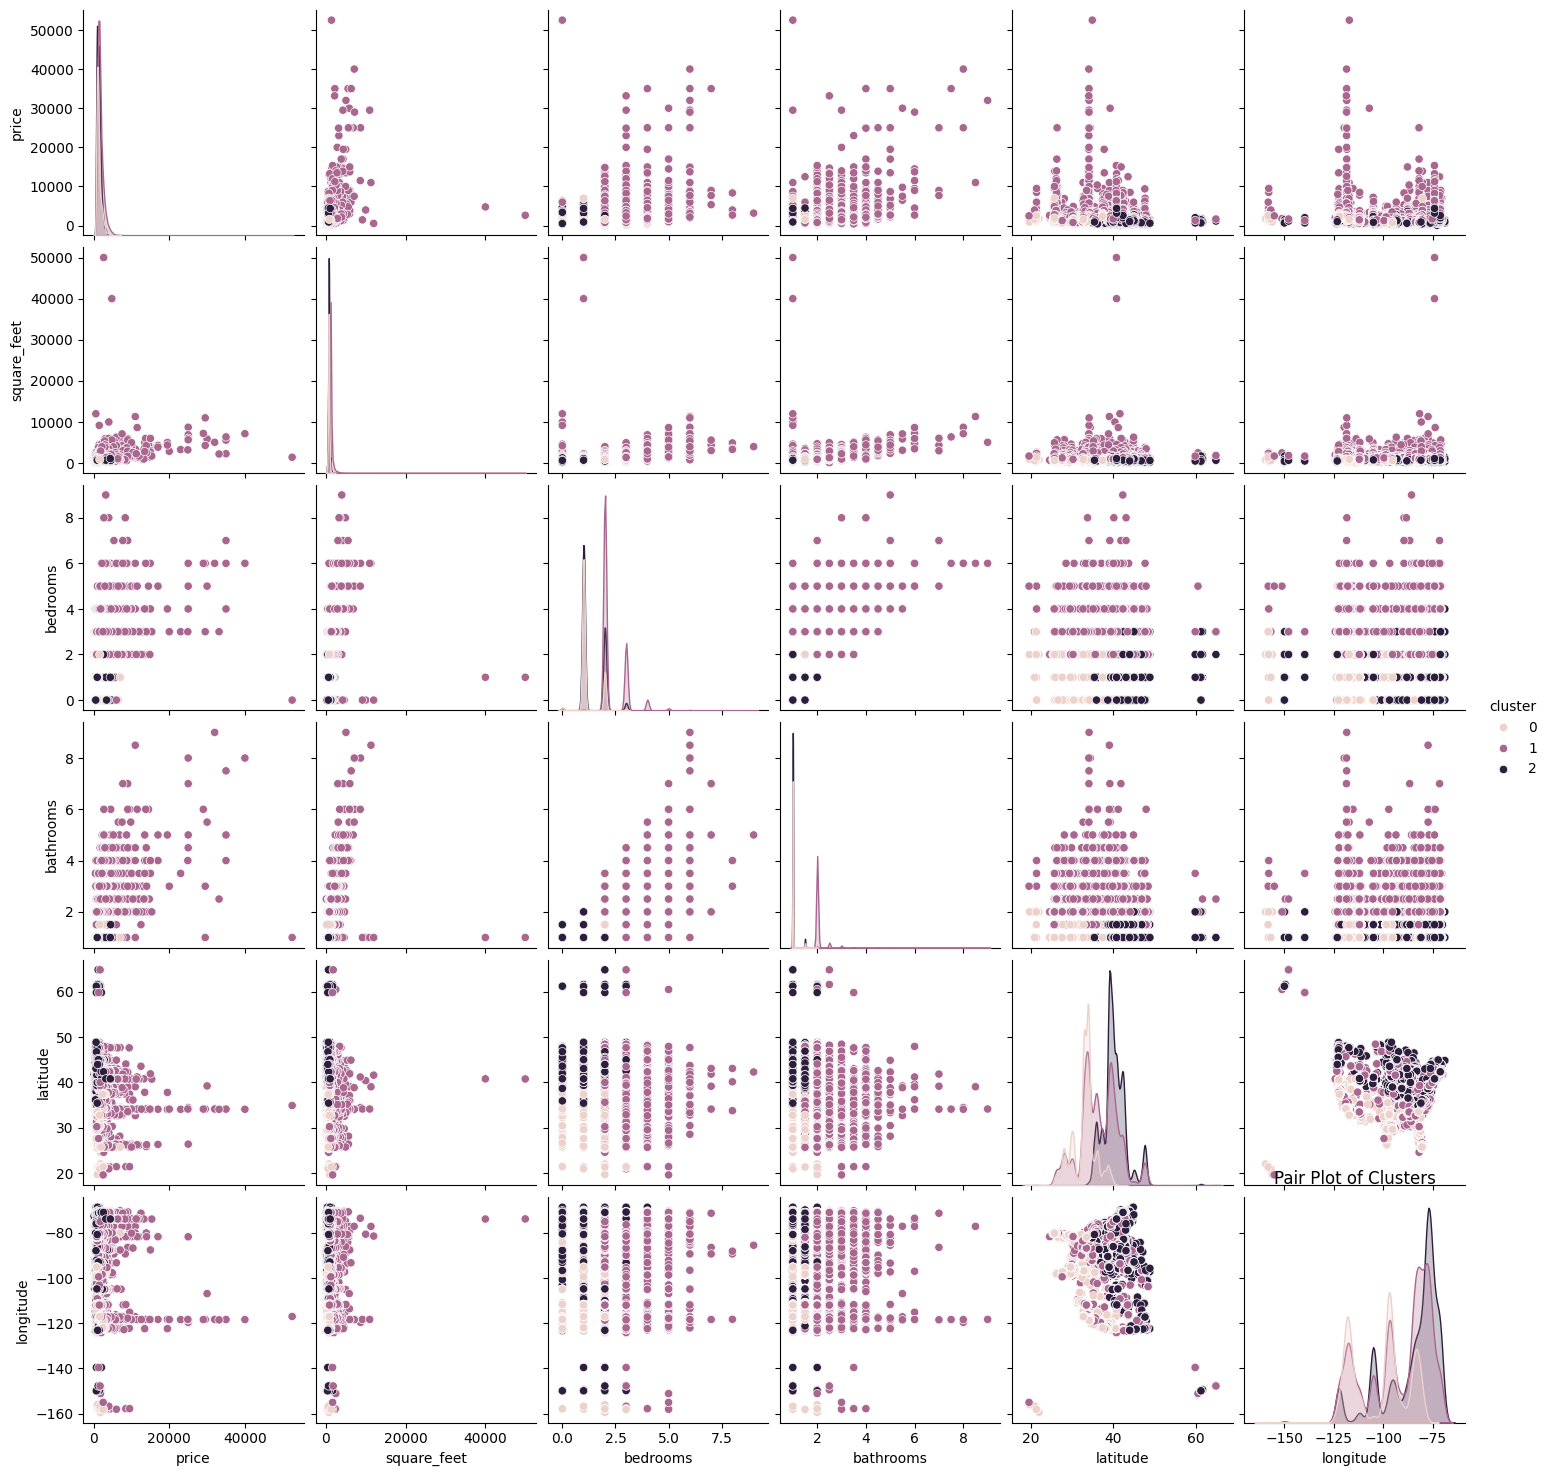

In [129]:
sns.pairplot(df, hue='cluster', vars=['price', 'square_feet', 'bedrooms', 'bathrooms', 'latitude', 'longitude'])
plt.title('Pair Plot of Clusters', y=1.02)
plt.show()

The pair plot reveals that Cluster 1 (pink) properties generally have larger sizes (square feet) and more bathrooms and bedrooms, correlating with higher prices. Clusters 0 (light pink) and 2 (dark purple) are more concentrated in smaller size ranges and have similar price distributions, with geographical variations evident in latitude and longitude. This suggests Cluster 1 targets more premium market segments, while Clusters 0 and 2 cater to mid-range or budget segments.

#### Clustering for Boston Metro Area

In [98]:
# List of cities in the Boston metro area
boston_cities = [
    'Boston', 'Cambridge', 'Somerville', 'Brookline', 'Quincy',
    'Newton', 'Medford', 'Malden', 'Everett', 'Revere'
]

boston_df = df[df['cityname'].isin(boston_cities)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

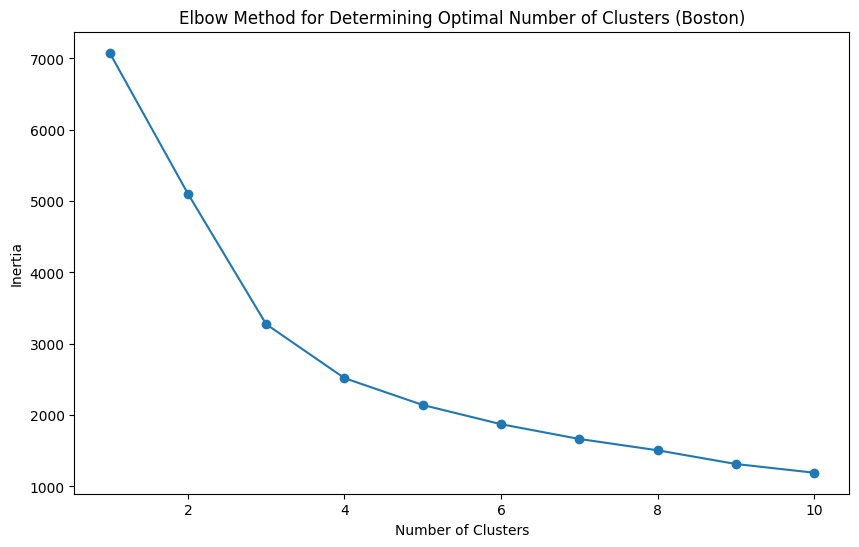

In [99]:
# Relevant features for clustering in Boston
boston_clustering_features = boston_df[['price', 'square_feet', 'bedrooms', 'bathrooms', 'latitude', 'longitude']]

boston_scaler = StandardScaler()
boston_clustering_features_scaled = boston_scaler.fit_transform(boston_clustering_features)

boston_inertia = []
for n_clusters in range(1, 11):
    boston_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    boston_kmeans.fit(boston_clustering_features_scaled)
    boston_inertia.append(boston_kmeans.inertia_)

# Elbow curve for Boston
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), boston_inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal Number of Clusters (Boston)')
plt.show()

<ipython-input-48-e7c8933f5e25>:11: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(data=boston_pca_df, x='PCA1', y='PCA2', hue='cluster', palette=colors)


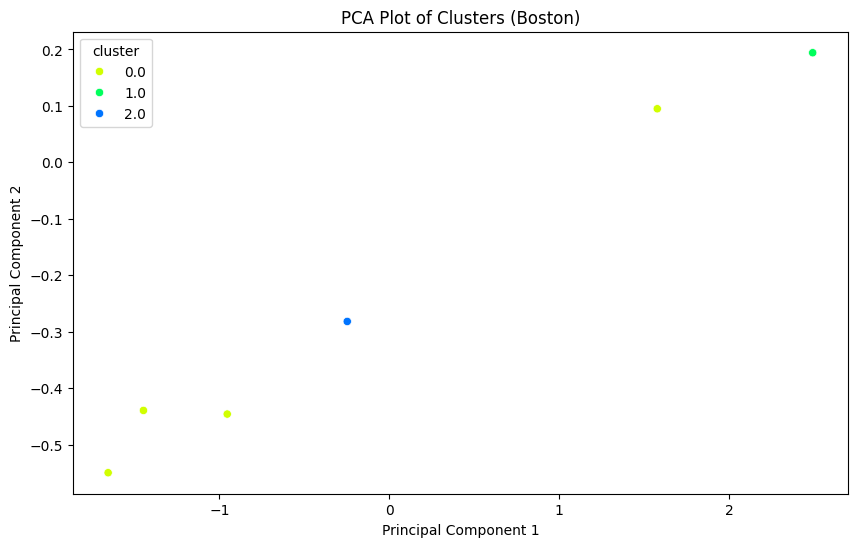

In [48]:
# Reduce the data to two dimensions using PCA for Boston
boston_pca = PCA(n_components=2)
boston_pca_components = boston_pca.fit_transform(boston_clustering_features_scaled)

# Create a DataFrame with the PCA components and cluster labels
boston_pca_df = pd.DataFrame(data=boston_pca_components, columns=['PCA1', 'PCA2'])
boston_pca_df['cluster'] = boston_df['cluster']

# Plot the PCA components for Boston
plt.figure(figsize=(10, 6))
sns.scatterplot(data=boston_pca_df, x='PCA1', y='PCA2', hue='cluster', palette=colors)
plt.title('PCA Plot of Clusters (Boston)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The PCA plot for Boston metro clusters shows distinct groupings, with Cluster 2 (blue) being notably separate, indicating unique property features or pricing. Clusters 0 (yellow) and 1 (green) have some overlap but remain distinct. Recommendations: Highlight unique features of Cluster 2 in marketing and differentiate the key attributes of Clusters 0 and 1 to attract specific renter demographics.

In [100]:
optimal_clusters_boston = 3
boston_kmeans = KMeans(n_clusters=optimal_clusters_boston, random_state=42)
boston_df['cluster'] = boston_kmeans.fit_predict(boston_clustering_features_scaled)

boston_cluster_summary = boston_df.groupby('cluster')[['price', 'square_feet', 'bedrooms', 'bathrooms', 'latitude', 'longitude']].mean()
print("Boston Cluster Summary Statistics:")
print(boston_cluster_summary)

Boston Cluster Summary Statistics:
               price  square_feet  bedrooms  bathrooms   latitude   longitude
cluster                                                                      
0        2422.571602    821.67233  1.606796   1.012136  42.302627  -71.206097
1        3388.420588   1266.00000  2.650000   1.870588  42.324562  -71.455563
2        1303.937500    794.87500  1.375000   1.062500  47.284912 -118.629325


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-100-53bf81a4af02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df['cluster'] = boston_kmeans.fit_predict(boston_clustering_features_scaled)


The Boston cluster summary shows three distinct groups: Cluster 1 targets the high-end market with larger, pricier properties (avg. price $3388, 2.65 bedrooms). Cluster 0 offers mid-range options (avg. price $2423, 1.61 bedrooms). Cluster 2 caters to budget-conscious renters with smaller, more affordable properties (avg. price $1304, 1.38 bedrooms). Tailor marketing strategies to emphasize luxury for Cluster 1, value for Cluster 0, and affordability for Cluster 2.

#### Classification

In [104]:
boston_df['price'].describe()

,price
count,1180.000000
mean,2685.699153
std,789.312543
min,525.000000
25%,2150.000000
50%,2558.000000
75%,3150.000000
max,6900.000000


In [110]:
# We are creating a column 'category' for Boston properties, which categorizes properties to 'Affordable', 'Mid-Range', 'High-end' based on prices
boston_df['category'] = pd.cut(boston_df['price'], bins=[524, 2317, 4109, np.inf], labels=['Affordable', 'Mid-Range', 'High-End'])

<ipython-input-110-d838bfda680b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df['category'] = pd.cut(boston_df['price'], bins=[524, 2317, 4109, np.inf], labels=['Affordable', 'Mid-Range', 'High-End'])


In [111]:
boston_df.isnull().sum()

,0
id,0
category,0
title,0
body,0
amenities,0
bathrooms,0
bedrooms,0
currency,0
fee,0
has_photo,0


In [112]:
# Relevant features and target variable
features = ['square_feet', 'bedrooms', 'bathrooms', 'latitude', 'longitude']
X = boston_df[features]
y = boston_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R2: {r2_lr}")

X_classification = boston_df[features]
y_classification = boston_df['category']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_clf = clf.predict(X_test_clf_scaled)

Linear Regression MAE: 516.2158022078277
Linear Regression MSE: 379708.4419709742
Linear Regression R2: 0.3568277496508693


In [113]:
print(classification_report(y_test_clf, y_pred_clf))
print(f"Decision Tree Classifier Accuracy: {accuracy_score(y_test_clf, y_pred_clf)}")

              precision    recall  f1-score   support

  Affordable       0.65      0.70      0.67        87
    High-End       0.56      0.69      0.62        13
   Mid-Range       0.76      0.71      0.73       136

    accuracy                           0.70       236
   macro avg       0.66      0.70      0.68       236
weighted avg       0.71      0.70      0.70       236

Decision Tree Classifier Accuracy: 0.7033898305084746


The regression results show a moderate Linear Regression performance with an MAE of 516.22, MSE of 379708.44, and R² of 0.36. The Decision Tree Classifier achieved a 70.34% accuracy, performing well in the "Affordable" and "Mid-Range" segments. Recommendations include exploring advanced regression techniques and feature engineering to improve predictive power, addressing data quality issues, and using classification insights for targeted marketing. Additionally, conduct hyperparameter tuning and cross-validation to enhance model accuracy and robustness.

**Hyperparameter Tuning**

In [115]:
# Modify values according to need
boston_df['square_feet'] = boston_df['square_feet'].replace(0, 1)
boston_df['bedrooms'] = boston_df['bedrooms'].replace(0, 1)
boston_df['price_per_sqft'] = boston_df['price'] / boston_df['square_feet']
boston_df['bathrooms_per_bedroom'] = boston_df['bathrooms'] / boston_df['bedrooms']

features = ['square_feet', 'bedrooms', 'bathrooms', 'latitude', 'longitude', 'price_per_sqft', 'bathrooms_per_bedroom']
X = boston_df[features]
y = boston_df['price']

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-115-a0c2f35f0c6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df['square_feet'] = boston_df['square_feet'].replace(0, 1)
<ipython-input-115-a0c2f35f0c6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df['bedrooms'] = boston_df['bedrooms'].replace(0, 1)
<ipython-input-115-a0c2f35f0c6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [116]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Model Parameters: {best_params}")

Best Model Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [117]:
best_model.fit(X_train_scaled, y_train)

importances = best_model.feature_importances_
print(f"Features: {features}")
print(f"Feature Importances: {importances}")

Features: ['square_feet', 'bedrooms', 'bathrooms', 'latitude', 'longitude', 'price_per_sqft', 'bathrooms_per_bedroom']
Feature Importances: [0.31369488 0.02044182 0.26316772 0.00118721 0.01070256 0.38297448
 0.00783134]


In [118]:
selector = SelectFromModel(best_model, threshold='mean', prefit=True)

support_mask = selector.get_support()

selected_features = np.array(features)[support_mask]
print(f"Selected Features: {selected_features}")
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

Selected Features: ['square_feet' 'bathrooms' 'price_per_sqft']


In [119]:
best_model.fit(X_train_selected, y_train)

y_pred_selected = best_model.predict(X_test_selected)

mae_selected = mean_absolute_error(y_test, y_pred_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"Best Model with Selected Features MAE: {mae_selected}, MSE: {mse_selected}, R2: {r2_selected}")

Best Model with Selected Features MAE: 58.671785120223035, MSE: 8755.16650739434, R2: 0.9851699895964583


With the highly accurate regression model (MAE: 58.67, MSE: 8755.17, R²: 0.99), implement dynamic pricing strategies to maximize revenue and use insights for targeted marketing and personalized deals. Make informed investment decisions by focusing on high-yield areas and property types, and prioritize property improvements that significantly impact rental prices to enhance value and income. These strategies will optimize profitability in the rental real estate market.

#### Regression

In [120]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MAE: {mae_lr}, MSE: {mse_lr}, R2: {r2_lr}")

Linear Regression MAE: 245.91900082605935, MSE: 111174.46664018197, R2: 0.8116862203032185


In [122]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MAE: {mae_ridge}, MSE: {mse_ridge}, R2: {r2_ridge}")

Ridge Regression MAE: 246.5681492973446, MSE: 111435.12365121423, R2: 0.8112447042929747


In [123]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MAE: {mae_lasso}, MSE: {mse_lasso}, R2: {r2_lasso}")

Lasso Regression MAE: 246.43200375927188, MSE: 111114.07521345578, R2: 0.8117885148153648


In [124]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor MAE: {mae_dt}, MSE: {mse_dt}, R2: {r2_dt}")

Decision Tree Regressor MAE: 98.1822033898305, MSE: 25502.61440677966, R2: 0.9568021879823033


Decision Tree Regressor has less MSE and higher R2 score.

**Hyperparameter Tuning for Decision Tree Regressor**

In [125]:
param_grid = {
    'max_depth': [None] + list(range(5, 51, 5)),
    'min_samples_split': list(range(2, 21, 2)),
    'min_samples_leaf': list(range(1, 21, 2)),
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.75, 1.0]
}

dt = DecisionTreeRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, n_iter=200, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_scaled, y_train)
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

print(f"Best Parameters from Randomized Search: {best_params_random}")
best_model_random.fit(X_train_scaled, y_train)

Best Parameters from Randomized Search: {'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': 50}


DecisionTreeRegressor(max_depth=50, max_features=1.0, min_samples_split=6,
                      random_state=42)

In [126]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor MAE: {mae_rf}, MSE: {mse_rf}, R2: {r2_rf}")

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Regressor MAE: {mae_gbr}, MSE: {mse_gbr}, R2: {r2_gbr}")

Random Forest Regressor MAE: 69.17796610169493, MSE: 18663.984077966103, R2: 0.9683858579029869
Gradient Boosting Regressor MAE: 93.14675654261026, MSE: 17173.719200543303, R2: 0.9709101552555899


The regression results for Random Forest (MAE: 69.18, MSE: 18663.98, R²: 0.97) and Gradient Boosting (MAE: 93.15, MSE: 17173.72, R²: 0.97) suggest highly accurate models. Utilize these models for dynamic pricing to optimize rental income. Focus on enhancing property features that significantly influence rental prices. Leverage model insights for targeted marketing and personalized offers to different segments. Make data-driven investment decisions by identifying high-return areas and property types to maximize profitability in the rental market.